In [1]:
!git clone https://github.com/NidhiAI/Biometric-Customer-Authentication

Cloning into 'Biometric-Customer-Authentication'...
remote: Enumerating objects: 1447, done.
remote: Counting objects: 100% (515/515), done.
remote: Compressing objects: 100% (420/420), done.
remote: Total 1447 (delta 189), reused 291 (delta 94), pack-reused 932 (from 1)
Receiving objects: 100% (1447/1447), 123.85 MiB | 28.80 MiB/s, done.
Resolving deltas: 100% (503/503), done.
Updating files: 100% (632/632), done.


In [2]:
!pip install python_speech_features

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5868 sha256=f62425e9873d554313d7899e631825b043855174f6aafcc76244bf1e9b1d90ea
  Stored in directory: /root/.cache/pip/wheels/37/01/19/e6c69a32684ab7b2e3ea4985a571d810cf055c72600e7f9f17
Successfully built python_speech_features


In [3]:
cd '/content/Biometric-Customer-Authentication'

/content/Biometric-Customer-Authentication


In [4]:
!python FeatureExtraction.py

In [5]:
!python TrainingModel.py

Akshay_Kumar_0001/Akshay_Kumar_0001-1.wav
Akshay_Kumar_0001/Akshay_Kumar_0001-2.wav
Akshay_Kumar_0001/Akshay_Kumar_0001-3.wav
Akshay_Kumar_0001/Akshay_Kumar_0001-4.wav
Akshay_Kumar_0001/Akshay_Kumar_0001-5.wav
Akshay_Kumar_0001/Akshay_Kumar_0001-6.wav
Akshay_Kumar_0001/Akshay_Kumar_0001-7.wav
Akshay_Kumar_0001/Akshay_Kumar_0001-8.wav
Akshay_Kumar_0001/Akshay_Kumar_0001-9.wav
Akshay_Kumar_0001/Akshay_Kumar_0001-10.wav
Training / GMM modeling completed for speaker: Akshay_Kumar_0001.gmm 

Amir_Khan_0002/Amir_Khan_0002-1.wav
Amir_Khan_0002/Amir_Khan_0002-2.wav
Amir_Khan_0002/Amir_Khan_0002-3.wav
Amir_Khan_0002/Amir_Khan_0002-4.wav
Amir_Khan_0002/Amir_Khan_0002-5.wav
Amir_Khan_0002/Amir_Khan_0002-6.wav
Amir_Khan_0002/Amir_Khan_0002-7.wav
Amir_Khan_0002/Amir_Khan_0002-8.wav
Amir_Khan_0002/Amir_Khan_0002-9.wav
Amir_Khan_0002/Amir_Khan_0002-10.wav
Training / GMM modeling completed for speaker: Amir_Khan_0002.gmm 

Irfan_khan_0003/Irfan_khan_0003-1.wav
Irfan_khan_0003/Irfan_khan_0003-2.wav
Irf

Press '1' for testing single Audio or Press '0' for testing full list of audios
Choice 0 or 1: 0

Testing Audio File: Akshay_Kumar_0001-11.wav
	Detected as - Akshay_Kumar_0001
speakers[winner] Akshay_Kumar_0001
checker_name Akshay_Kumar_0001

Testing Audio File: Amir_Khan_0002-11.wav
	Detected as - Amir_Khan_0002
speakers[winner] Amir_Khan_0002
checker_name Amir_Khan_0002

Testing Audio File: Irfan_khan_0003-11.wav
	Detected as - Irfan_khan_0003
speakers[winner] Irfan_khan_0003
checker_name Irfan_khan_0003

Testing Audio File: John_Abraham_0004-11.wav
	Detected as - Amir_Khan_0002
speakers[winner] Amir_Khan_0002
checker_name John_Abraham_0004

Testing Audio File: Kangana_Ranaut_0005-11.wav
	Detected as - Kangana_Ranaut_0005
speakers[winner] Kangana_Ranaut_0005
checker_name Kangana_Ranaut_0005

Testing Audio File: Parineeti_Chopra_0006-11.wav
	Detected as - Parineeti_Chopra_0006
speakers[winner] Parineeti_Chopra_0006
checker_name Parineeti_Chopra_0006

Testing Audio File: Vidya_Balan_00

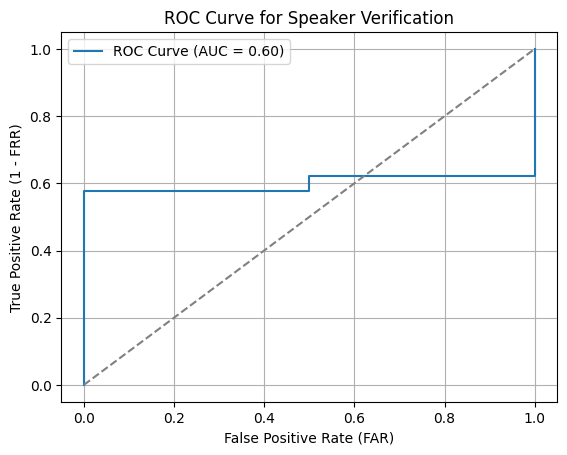


Evaluation Metrics:
                        Metric      Value
0  False Acceptance Rate (FAR)   0.500000
1   False Rejection Rate (FRR)   0.422222
2       Equal Error Rate (EER)   0.461111
3                     Accuracy  95.744681
4                          AUC   0.600000

Confusion Matrix:
[[ 2  0]
 [28 17]]

Speaker Identification Process End


In [7]:
# -*- coding: utf-8 -*-
import os
import _pickle as cPickle
import numpy as np
import pandas as pd
import time
import warnings
#import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
#%matplotlib notebook
from scipy.io.wavfile import read
from sklearn.metrics import roc_curve, auc, confusion_matrix

from FeatureExtraction import extract_features

warnings.filterwarnings("ignore")

base_path = "../Biometric-Customer-Authentication/"

# Path to test data files
test_file = os.path.join(base_path, "testDataPath.txt")
file_paths = open(test_file, 'r')

# Path to read test data wav files
source = os.path.join(base_path, "testData/")

# Path where trained GMM models are stored
modelpath = os.path.join(base_path, "speakerTrainedModelsGMM/")

gmm_files = [os.path.join(modelpath, fname) for fname in os.listdir(modelpath) if fname.endswith('.gmm')]

# Load the GMM Gaussian Models
models = [cPickle.load(open(fname, 'rb')) for fname in gmm_files]
speakers = [fname.split("/")[-1].split(".gmm")[0] for fname in gmm_files]

error = 0
total_sample = 0

# Evaluation Metrics
true_scores = []
false_scores = []
y_true = []
y_pred = []

print("Press '1' for testing single Audio or Press '0' for testing full list of audios")
take = int(input("Choice 0 or 1: ").strip())

if take == 1:
    path = input("Enter the File name (with .wav extension): ").strip()
    print("\nTesting Audio File:", path)

    sr, audio = read(source + path)
    vector = extract_features(audio, sr)

    log_likelihood = np.zeros(len(models))

    for i in range(len(models)):
        gmm = models[i]
        scores = np.array(gmm.score(vector))
        log_likelihood[i] = scores.sum()

    winner = np.argmax(log_likelihood)
    print("\nDetected Speaker:", speakers[winner])

    time.sleep(1.0)

elif take == 0:
    for path in file_paths:
        total_sample += 1
        path = path.strip()
        print("\nTesting Audio File:", path)

        sr, audio = read(source + path)
        vector = extract_features(audio, sr)

        log_likelihood = np.zeros(len(models))
        for i in range(len(models)):
            gmm = models[i]
            scores = np.array(gmm.score(vector))
            log_likelihood[i] = scores.sum()

        winner = np.argmax(log_likelihood)
        print("\tDetected as -", speakers[winner])

        checker_name = path.split("-")[0]  # Extract true label
        is_correct = 1 if speakers[winner] == checker_name else 0
        print('speakers[winner]', speakers[winner])
        print('checker_name', checker_name)
        y_true.append(is_correct)
        y_pred.append(log_likelihood[winner])

        if not is_correct:
            error += 1
            false_scores.append(log_likelihood[winner])
        else:
            true_scores.append(log_likelihood[winner])

        time.sleep(1.0)

    print("\n\nTotal audios tested:", total_sample)
    print("Incorrect Identifications:", error)

    # Accuracy Calculation
    accuracy = ((total_sample - error) / total_sample) * 100
    print("MFCC + GMM Accuracy: {:.2f}%".format(accuracy))

    # Compute ROC Curve
    if len(set(y_true)) > 1:  # Ensure both classes exist
        fpr, tpr, thresholds = roc_curve(y_true, y_pred)
        far = fpr  # FAR: False Positive Rate
        frr = 1 - tpr  # FRR: False Rejection Rate

        # Ensure no NaN values in far and frr
        if np.isnan(far).any() or np.isnan(frr).any():
            eer = np.nan
            roc_auc = np.nan
            print("Warning: Unable to calculate EER due to NaN values in ROC computation.")
        else:
            eer_index = np.nanargmin(np.abs(far - frr))
            eer = (far[eer_index] + frr[eer_index]) / 2
            roc_auc = auc(fpr, tpr)

            # Plot ROC Curve
            plt.figure()
            plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
            plt.xlabel('False Positive Rate (FAR)')
            plt.ylabel('True Positive Rate (1 - FRR)')
            plt.title('ROC Curve for Speaker Verification')
            plt.legend()
            plt.grid()
            plt.draw()
            plt.show()
    else:
        eer = np.nan
        roc_auc = np.nan
        print("Warning: Not enough positive/negative samples to compute ROC Curve.")

    # Compute Confusion Matrix
    threshold = np.mean(y_pred) if len(y_pred) > 0 else 0
    y_pred_labels = [1 if score > threshold else 0 for score in y_pred] if len(y_pred) > 0 else []
    conf_matrix = confusion_matrix(y_true, y_pred_labels) if len(set(y_true)) > 1 else [[0, 0], [0, 0]]

    # Display Evaluation Metrics
    evaluation_matrix = pd.DataFrame({
        "Metric": ["False Acceptance Rate (FAR)", "False Rejection Rate (FRR)", "Equal Error Rate (EER)", "Accuracy", "AUC"],
        "Value": [far[eer_index] if 'eer_index' in locals() else np.nan,
                  frr[eer_index] if 'eer_index' in locals() else np.nan,
                  eer, accuracy, roc_auc]
    })

    print("\nEvaluation Metrics:")
    print(evaluation_matrix)

    print("\nConfusion Matrix:")
    print(conf_matrix)

print("\nSpeaker Identification Process End")


In [6]:
!python Test1-31-Jan-2025.py

Start with Testing
Choice 0 or 1: 0

Testing Audio File:  Akshay_Kumar_0001-11.wav
	detected as -  Akshay_Kumar_0001

Testing Audio File:  Amir_Khan_0002-11.wav
	detected as -  Amir_Khan_0002

Testing Audio File:  Irfan_khan_0003-11.wav
	detected as -  Irfan_khan_0003

Testing Audio File:  John_Abraham_0004-11.wav
	detected as -  John_Abraham_0004

Testing Audio File:  Kangana_Ranaut_0005-11.wav
	detected as -  Kangana_Ranaut_0005

Testing Audio File:  Parineeti_Chopra_0006-11.wav
	detected as -  Parineeti_Chopra_0006

Testing Audio File:  Vidya_Balan_0007-11.wav
	detected as -  Vidya_Balan_0007

Testing Audio File:  aew_0051-11.wav
	detected as -  aew_0051

Testing Audio File:  ahw_0052-11.wav
	detected as -  ahw_0052

Testing Audio File:  aup_0053-11.wav
	detected as -  aup_0053

Testing Audio File:  awb_0054-11.wav
	detected as -  awb_0054

Testing Audio File:  axb_0055-11.wav
	detected as -  axb_0055

Testing Audio File:  bdl_0056-11.wav
	detected as -  bdl_0056

Testing Audio File

Start with Testing
Choice 0 or 1: 0

Testing Audio File:  Akshay_Kumar_0001-11.wav
	detected as -  Akshay_Kumar_0001

Testing Audio File:  Amir_Khan_0002-11.wav
	detected as -  Amir_Khan_0002

Testing Audio File:  Irfan_khan_0003-11.wav
	detected as -  Irfan_khan_0003

Testing Audio File:  John_Abraham_0004-11.wav
	detected as -  John_Abraham_0004

Testing Audio File:  Kangana_Ranaut_0005-11.wav
	detected as -  Kangana_Ranaut_0005

Testing Audio File:  Parineeti_Chopra_0006-11.wav
	detected as -  Parineeti_Chopra_0006

Testing Audio File:  Vidya_Balan_0007-11.wav
	detected as -  Vidya_Balan_0007

Testing Audio File:  aew_0051-11.wav
	detected as -  aew_0051

Testing Audio File:  ahw_0052-11.wav
	detected as -  ahw_0052

Testing Audio File:  aup_0053-11.wav
	detected as -  aup_0053

Testing Audio File:  awb_0054-11.wav
	detected as -  awb_0054

Testing Audio File:  axb_0055-11.wav
	detected as -  axb_0055

Testing Audio File:  bdl_0056-11.wav
	detected as -  bdl_0056

Testing Audio File

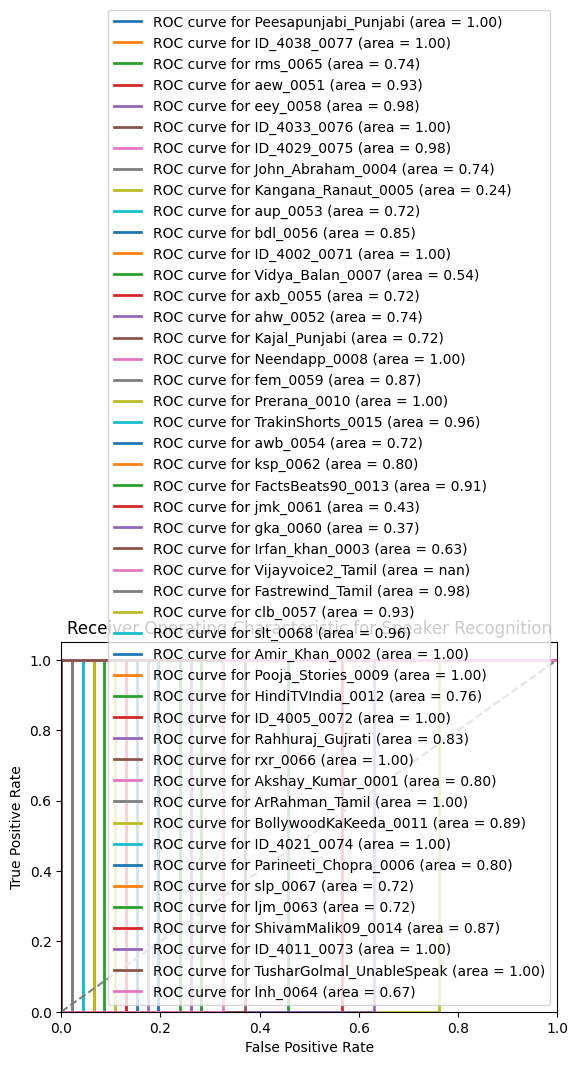

Speaker Identification process End


In [8]:
# -*- coding: utf-8 -*-
"""Updated Speaker Recognition with Metrics and ROC Curve"""

import os
import _pickle as cPickle
import numpy as np
from scipy.io.wavfile import read
from FeatureExtraction import extract_features
import warnings
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import time

warnings.filterwarnings("ignore")

base_path = "../Biometric-Customer-Authentication/"

test_file = os.path.join(base_path, "testDataPath.txt")
file_paths = open(test_file, 'r')
source = os.path.join(base_path, "testData/")
modelpath = os.path.join(base_path, "speakerTrainedModelsGMM/")

gmm_files = [os.path.join(modelpath, fname) for fname in os.listdir(modelpath) if fname.endswith('.gmm')]

# Load the GMM Gaussian Models
models = [cPickle.load(open(fname, 'rb')) for fname in gmm_files]
speakers = [fname.split("/")[-1].split(".gmm")[0] for fname in gmm_files]

true_labels = []
pred_labels = []
pred_scores = []

error = 0
total_sample = 0.0

print("Start with Testing")
take = int(input("Choice 0 or 1: ").strip())
if take == 1:
    path = input("Enter the File name from the sample with .wav notation: ").strip()
    print("Testing Audio File: ", path)
    sr, audio = read(source + path)
    vector = extract_features(audio, sr)

    log_likelihood = np.zeros(len(models))

    for i in range(len(models)):
        gmm = models[i]
        scores = np.array(gmm.score(vector))
        log_likelihood[i] = scores.sum()

    winner = np.argmax(log_likelihood)
    print("The person in the given audio sample is detected as:", speakers[winner])
    time.sleep(1.0)

elif take == 0:
    for path in file_paths:
        total_sample += 1.0
        path = path.strip()
        print("\nTesting Audio File: ", path)
        sr, audio = read(source + path)
        vector = extract_features(audio, sr)

        log_likelihood = np.zeros(len(models))
        for i in range(len(models)):
            gmm = models[i]
            scores = np.array(gmm.score(vector))
            log_likelihood[i] = scores.sum()

        winner = np.argmax(log_likelihood)
        print("\tdetected as - ", speakers[winner])

        true_label = path.split("-")[0]  # Assuming filename structure: SpeakerID-Filename.wav
        true_labels.append(true_label)
        pred_labels.append(speakers[winner])
        pred_scores.append(log_likelihood.tolist())

        if speakers[winner] != true_label:
            error += 1

        time.sleep(1.0)

    print('\n\nTotal number of audios tested: ', total_sample)
    print('Total users not identified correctly: ', error)

    accuracy = accuracy_score(true_labels, pred_labels)
    conf_matrix = confusion_matrix(true_labels, pred_labels)
    report = classification_report(true_labels, pred_labels)

    print("MFCC + GMM current testing Accuracy in Percentage: ", accuracy * 100, "%")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(report)

    # Convert labels to one-hot encoding for multi-class ROC computation
    true_labels_bin = label_binarize(true_labels, classes=speakers)
    pred_scores = np.array(pred_scores)

    plt.figure()
    for i, speaker in enumerate(speakers):
        fpr, tpr, _ = roc_curve(true_labels_bin[:, i], pred_scores[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'ROC curve for {speaker} (area = %0.2f)' % roc_auc)

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for Speaker Recognition')
    plt.legend(loc='lower right')
    plt.show()

print("Speaker Identification process End")


Start with Testing
Choice 0 or 1: 0

Testing Audio File:  Akshay_Kumar_0001-11.wav
	detected as -  Akshay_Kumar_0001

Testing Audio File:  Amir_Khan_0002-11.wav
	detected as -  Amir_Khan_0002

Testing Audio File:  Irfan_khan_0003-11.wav
	detected as -  Irfan_khan_0003

Testing Audio File:  John_Abraham_0004-11.wav
	detected as -  John_Abraham_0004

Testing Audio File:  Kangana_Ranaut_0005-11.wav
	detected as -  Kangana_Ranaut_0005

Testing Audio File:  Parineeti_Chopra_0006-11.wav
	detected as -  Parineeti_Chopra_0006

Testing Audio File:  Vidya_Balan_0007-11.wav
	detected as -  Vidya_Balan_0007

Testing Audio File:  aew_0051-11.wav
	detected as -  aew_0051

Testing Audio File:  ahw_0052-11.wav
	detected as -  ahw_0052

Testing Audio File:  aup_0053-11.wav
	detected as -  aup_0053

Testing Audio File:  awb_0054-11.wav
	detected as -  awb_0054

Testing Audio File:  axb_0055-11.wav
	detected as -  axb_0055

Testing Audio File:  bdl_0056-11.wav
	detected as -  bdl_0056

Testing Audio File

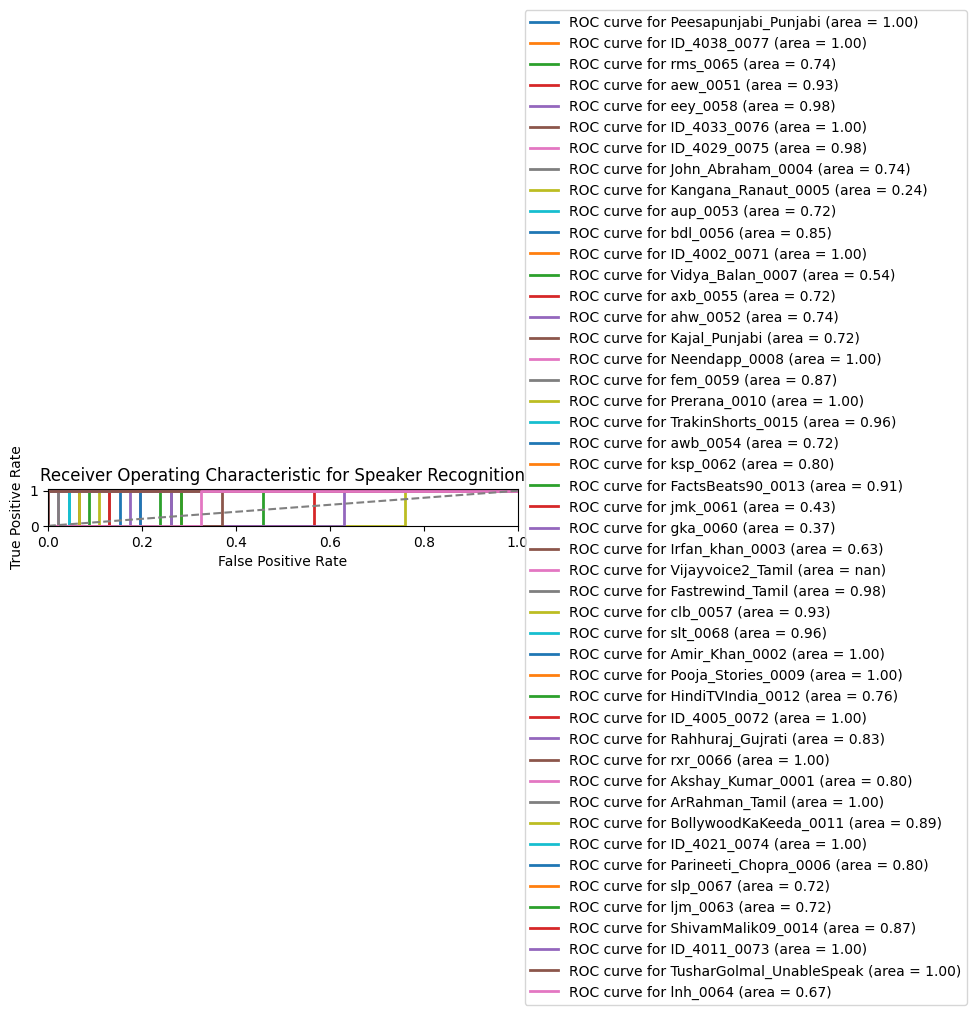

Speaker Identification process End


In [9]:
# -*- coding: utf-8 -*-
"""Updated Speaker Recognition with Metrics and ROC Curve"""

import os
import _pickle as cPickle
import numpy as np
from scipy.io.wavfile import read
from FeatureExtraction import extract_features
import warnings
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import time

warnings.filterwarnings("ignore")

base_path = "../Biometric-Customer-Authentication/"

test_file = os.path.join(base_path, "testDataPath.txt")
file_paths = open(test_file, 'r')
source = os.path.join(base_path, "testData/")
modelpath = os.path.join(base_path, "speakerTrainedModelsGMM/")

gmm_files = [os.path.join(modelpath, fname) for fname in os.listdir(modelpath) if fname.endswith('.gmm')]

# Load the GMM Gaussian Models
models = [cPickle.load(open(fname, 'rb')) for fname in gmm_files]
speakers = [fname.split("/")[-1].split(".gmm")[0] for fname in gmm_files]

true_labels = []
pred_labels = []
pred_scores = []

error = 0
total_sample = 0.0

print("Start with Testing")
take = int(input("Choice 0 or 1: ").strip())
if take == 1:
    path = input("Enter the File name from the sample with .wav notation: ").strip()
    print("Testing Audio File: ", path)
    sr, audio = read(source + path)
    vector = extract_features(audio, sr)

    log_likelihood = np.zeros(len(models))

    for i in range(len(models)):
        gmm = models[i]
        scores = np.array(gmm.score(vector))
        log_likelihood[i] = scores.sum()

    winner = np.argmax(log_likelihood)
    print("The person in the given audio sample is detected as:", speakers[winner])
    time.sleep(1.0)

elif take == 0:
    for path in file_paths:
        total_sample += 1.0
        path = path.strip()
        print("\nTesting Audio File: ", path)
        sr, audio = read(source + path)
        vector = extract_features(audio, sr)

        log_likelihood = np.zeros(len(models))
        for i in range(len(models)):
            gmm = models[i]
            scores = np.array(gmm.score(vector))
            log_likelihood[i] = scores.sum()

        winner = np.argmax(log_likelihood)
        print("\tdetected as - ", speakers[winner])

        true_label = path.split("-")[0]  # Assuming filename structure: SpeakerID-Filename.wav
        true_labels.append(true_label)
        pred_labels.append(speakers[winner])
        pred_scores.append(log_likelihood.tolist())

        if speakers[winner] != true_label:
            error += 1

        time.sleep(1.0)

    print('\n\nTotal number of audios tested: ', total_sample)
    print('Total users not identified correctly: ', error)

    accuracy = accuracy_score(true_labels, pred_labels)
    conf_matrix = confusion_matrix(true_labels, pred_labels)
    report = classification_report(true_labels, pred_labels)

    print("MFCC + GMM current testing Accuracy in Percentage: ", accuracy * 100, "%")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(report)

    # Convert labels to one-hot encoding for multi-class ROC computation
    true_labels_bin = label_binarize(true_labels, classes=speakers)
    pred_scores = np.array(pred_scores)

    plt.figure(figsize=(10, 6))
    for i, speaker in enumerate(speakers):
        fpr, tpr, _ = roc_curve(true_labels_bin[:, i], pred_scores[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'ROC curve for {speaker} (area = %0.2f)' % roc_auc)

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for Speaker Recognition')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.show()

print("Speaker Identification process End")


In [ ]:
!pip install ffmpeg-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# add new user
file_name = input('Enter your name: ')
print(f'You entered {file_name}')
# Nidhi_Agarwal_0010

Enter your name: Nidhi_Agarwal_0010
You entered Nidhi_Agarwal_0010


In [ ]:
cd '/content/Biometric-Customer-Authentication/addNewCustomer'

/content/Biometric-Customer-Authentication/addNewCustomer


In [ ]:
!mkdir {file_name}

In [ ]:

pwd

'/content/Biometric-Customer-Authentication/addNewCustomer'

In [ ]:
cd '/content/Biometric-Customer-Authentication/addNewCustomer/'{file_name}

/content/Biometric-Customer-Authentication/addNewCustomer/Nidhi_Agarwal_0010


In [ ]:
pwd

'/content/Biometric-Customer-Authentication/addNewCustomer/Nidhi_Agarwal_0010'

In [ ]:
cd '/content/Biometric-Customer-Authentication'

/content/Biometric-Customer-Authentication


In [ ]:
!python RecordAudio.py

In [ ]:
from RecordAudio import record
import IPython

In [ ]:
filename1 = file_name+'-1'+'.mp3'  #'felixtest.wav'
record(filename1, 3)
IPython.display.Audio(filename1)

<IPython.core.display.Javascript object>

In [ ]:
filename2 = file_name+'-2'+'.mp3'  #'felixtest.wav'
record(filename2, 3)
IPython.display.Audio(filename2)

<IPython.core.display.Javascript object>

In [ ]:
filename3 = file_name+'-3'+'.mp3'  #'felixtest.wav'
record(filename3, 2)
IPython.display.Audio(filename3)

<IPython.core.display.Javascript object>

In [ ]:
filename4 = file_name+'-4'+'.mp3'  #'felixtest.wav'
record(filename4, 2)
IPython.display.Audio(filename4)

<IPython.core.display.Javascript object>

In [ ]:
filename5 = file_name+'-5'+'.mp3'  #'felixtest.wav'
record(filename5, 1)
IPython.display.Audio(filename5)

<IPython.core.display.Javascript object>

In [ ]:
import subprocess

In [ ]:
subprocess.call(['ffmpeg', '-i', '/content/Biometric-Customer-Authentication/Nidhi_Agarwal_0010-1.mp3',
                 '/content/Biometric-Customer-Authentication/addNewCustomer/Nidhi_Agarwal_0010/Nidhi_Agarwal_0010-1.wav'])

subprocess.call(['ffmpeg', '-i', '/content/Biometric-Customer-Authentication/Nidhi_Agarwal_0010-2.mp3',
                 '/content/Biometric-Customer-Authentication/addNewCustomer/Nidhi_Agarwal_0010/Nidhi_Agarwal_0010-2.wav'])


subprocess.call(['ffmpeg', '-i', '/content/Biometric-Customer-Authentication/Nidhi_Agarwal_0010-3.mp3',
                 '/content/Biometric-Customer-Authentication/addNewCustomer/Nidhi_Agarwal_0010/Nidhi_Agarwal_0010-3.wav'])


subprocess.call(['ffmpeg', '-i', '/content/Biometric-Customer-Authentication/Nidhi_Agarwal_0010-4.mp3',
                 '/content/Biometric-Customer-Authentication/addNewCustomer/Nidhi_Agarwal_0010/Nidhi_Agarwal_0010-4.wav'])


subprocess.call(['ffmpeg', '-i', '/content/Biometric-Customer-Authentication/Nidhi_Agarwal_0010-5.mp3',
                 '/content/Biometric-Customer-Authentication/addNewCustomer/Nidhi_Agarwal_0010/Nidhi_Agarwal_0010-5.wav'])

0

In [ ]:
pwd

'/content/Biometric-Customer-Authentication'

In [ ]:
# Write line to file

with open('addUserTrain.txt', 'w') as writefile:
    writefile.write(file_name+'/'+filename1.split(".")[0]+'.wav'+'\n')
    writefile.write(file_name+'/'+filename2.split(".")[0]+'.wav'+'\n')
    writefile.write(file_name+'/'+filename3.split(".")[0]+'.wav'+'\n')
    writefile.write(file_name+'/'+filename4.split(".")[0]+'.wav'+'\n')
    writefile.write(file_name+'/'+filename5.split(".")[0]+'.wav')
#    writefile.write(file_name+'/'+filename5+'\n')
#    writefile.write(file_name+'/'+filename6+'\n')
#    writefile.write(file_name+'/'+filename7+'\n')
#    writefile.write(file_name+'/'+filename8+'\n')
#    writefile.write(file_name+'/'+filename9+'\n')
#    writefile.write(file_name+'/'+filename10+'\n')

In [ ]:
import shutil

shutil.copy('/content/Biometric-Customer-Authentication/addUserTrain.txt',
                 '/content/Biometric-Customer-Authentication/addNewCustomer/Nidhi_Agarwal_0010/addUserTrain.txt')


'/content/Biometric-Customer-Authentication/addNewCustomer/Nidhi_Agarwal_0010/addUserTrain.txt'

In [ ]:
!python addNewUserTrain.py Nidhi_Agarwal_0010

newUser >Nidhi_Agarwal_0010 

Nidhi_Agarwal_0010/Nidhi_Agarwal_0010-1.wav
Nidhi_Agarwal_0010/Nidhi_Agarwal_0010-2.wav
Nidhi_Agarwal_0010/Nidhi_Agarwal_0010-3.wav
Nidhi_Agarwal_0010/Nidhi_Agarwal_0010-4.wav
Nidhi_Agarwal_0010/Nidhi_Agarwal_0010-5.wav

MFCC + GMM Training modeling completed for speaker: Nidhi_Agarwal_0010.gmm


In [ ]:
# Now do testing for new user

filename11 = file_name+'-11'+'.mp3'  #'felixtest.wav'
record(filename11, 5)
IPython.display.Audio(filename11)

<IPython.core.display.Javascript object>

In [ ]:
subprocess.call(['ffmpeg', '-i', '/content/Biometric-Customer-Authentication/Nidhi_Agarwal_0010-11.mp3',
                 '/content/Biometric-Customer-Authentication/testData/Nidhi_Agarwal_0010-11.wav'])

0

In [ ]:
pwd

'/content/Biometric-Customer-Authentication'

In [ ]:
# append new test line to file

with open("/content/Biometric-Customer-Authentication/testDataPath.txt", "a") as myfile:
    myfile.write("\nNidhi_Agarwal_0010-11.wav")


In [ ]:
!python Test.py

 Start with Testing 

Press '1' for testing single Audio or Press '0' for testing full list of audios ?
Choice 0 or 1: 0

Testing Audio File :  Akshay_Kumar_0001-11.wav
	detected as -  Akshay_Kumar_0001

Testing Audio File :  Amir_Khan_0002-11.wav
	detected as -  Amir_Khan_0002

Testing Audio File :  Irfan_khan_0003-11.wav
	detected as -  Irfan_khan_0003

Testing Audio File :  John_Abraham_0004-11.wav
	detected as -  John_Abraham_0004

Testing Audio File :  Kangana_Ranaut_0005-11.wav
	detected as -  Kangana_Ranaut_0005

Testing Audio File :  Parineeti_Chopra_0006-11.wav
	detected as -  Parineeti_Chopra_0006

Testing Audio File :  Vidya_Balan_0007-11.wav
	detected as -  Vidya_Balan_0007

Testing Audio File :  aew_0051-11.wav
	detected as -  aew_0051

Testing Audio File :  ahw_0052-11.wav
	detected as -  ahw_0052

Testing Audio File :  aup_0053-11.wav
	detected as -  aup_0053

Testing Audio File :  awb_0054-11.wav
	detected as -  awb_0054

Testing Audio File :  axb_0055-11.wav
	detected 

In [ ]:
!python Test.py

 Start with Testing 

Press '1' for testing single Audio or Press '0' for testing full list of audios ?
Choice 0 or 1: 1
Enter the File name from the sample with .wav notation :
TrakinShorts_0015-11.wav
('Testing Audio File : ', 'TrakinShorts_0015-11.wav')

The person in the given audio sample is detected as :  TrakinShorts_0015
Speaker Identification process End
